In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
gps_data = pd.read_csv("delays_vs_gps.csv", parse_dates=['sequence_time', 'file_date'])
tdoa_data = pd.read_csv("fit_results.csv", parse_dates=['sequence_time', 'file_date'])
deepness_hydrophone = 3 # meters

with open("shift_infos.json", "r") as f:
    shifts = json.load(f)

In [6]:
# diff gps - estimation

tdoa_time = (tdoa_data.sequence_time-tdoa_data.sequence_time[0]).dt.total_seconds()+shifts['time_shift']
tdoa_angles = -tdoa_data.azimuth+shifts['angle_shift-in_rad']/2
gps_time = (gps_data.sequence_time-gps_data.sequence_time[0]).dt.total_seconds()
gps_angles = gps_data.fwd_azimuth

gps_angles_interpolated = np.interp(tdoa_time, gps_time, gps_angles)

differences = np.abs(gps_angles_interpolated - tdoa_angles)

print("azimuths")
print(min(differences))
print(np.mean(differences))
print(max(differences))


tdoa_angles = -tdoa_data.elevation
gps_angles = np.arcsin(deepness_hydrophone/gps_data.distance) - np.radians(90)

gps_angles_interpolated = np.interp(tdoa_time, gps_time, gps_angles)

differences = np.abs(gps_angles_interpolated - tdoa_angles)

print("\nelevation")
print(min(differences))
print(np.mean(differences))
print(max(differences))

azimuths
0.0001433961305904452
0.15136828935876057
0.5281638920330991

elevation
0.0002870695723091732
0.07667051766363757
1.299007935341925


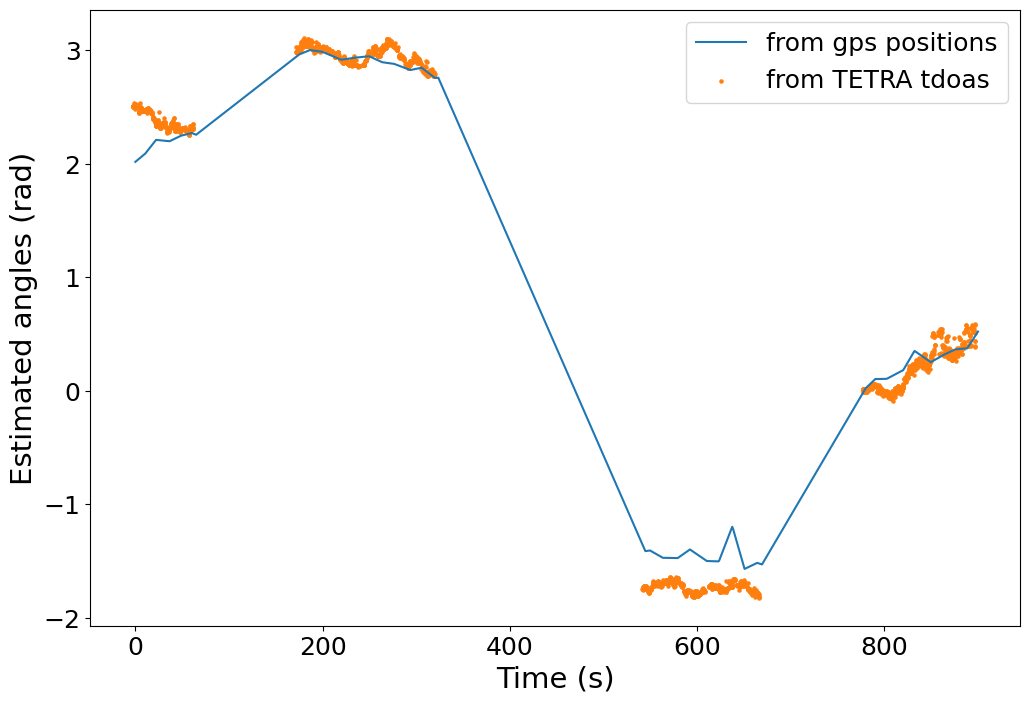

In [16]:
fig = plt.figure(figsize=(12,8))
plt.plot(
    (gps_data.sequence_time-gps_data.sequence_time[0]).dt.total_seconds(), 
    gps_data.fwd_azimuth, 
    label="from gps positions", 
    color="tab:blue")
plt.scatter(
    (tdoa_data.sequence_time-tdoa_data.sequence_time[0]).dt.total_seconds()+shifts['time_shift'], 
    -tdoa_data.azimuth+shifts['angle_shift-in_rad']/2, 
    label="from TETRA tdoas", 
    color="tab:orange", 
    s=5)
plt.legend(fontsize=18)
plt.xlabel("Time (s)", fontsize=21)
plt.ylabel("Estimated angles (rad)", fontsize=21)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

fig.savefig("gps_VS_tetra_azimuth.pdf")

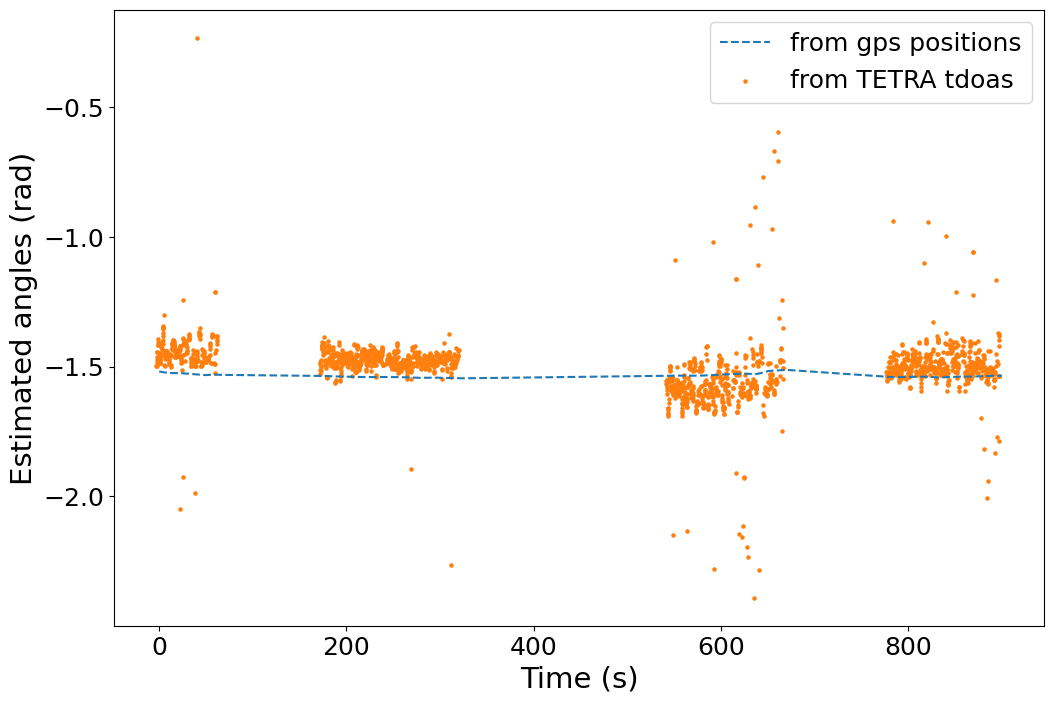

In [18]:
# compute an approximation of the elevation
gps_elevation = np.arcsin(deepness_hydrophone/gps_data.distance) - np.radians(90)

fig = plt.figure(figsize=(12,8))
plt.plot(
    (gps_data.sequence_time-gps_data.sequence_time[0]).dt.total_seconds(), 
    gps_elevation, 
    label="from gps positions", 
    color="tab:blue",
    ls="dashed")
plt.scatter(
    (tdoa_data.sequence_time-tdoa_data.sequence_time[0]).dt.total_seconds()+shifts['time_shift'], 
    -tdoa_data.elevation, 
    label="from TETRA tdoas", 
    color="tab:orange", 
    s=5, zorder=-1)
plt.legend(fontsize=18)
plt.xlabel("Time (s)", fontsize=21)
plt.ylabel("Estimated angles (rad)", fontsize=21)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

fig.savefig("gps_VS_tetra_elevation.pdf")